# Project: Investigate European Soccer Database
### by Luyuan Zhang, June 19th, 2018

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This is a part of Udacity Data Analysis Nano Degree. I select European Soccer Database for my project. The reason I picked this database is that it is well suited for data analysis. The amount of data is overwhelming, and it was very hard for me to decide what questions to ask, because there are potentially hundreds of questions to ask. Finally I decided on obvious questions.

>There are two major tables in this database, match and player_attributes. I will explore each of them, and answer three questions of each. 

>For the table match, I will try to answer these questions:
>(1) Is there a home game advantage?
>(2) Which team improved most over the years?
>(3) which team attributes lead to most victories?

>For the table player_attributes, I will try to answer these questions:
>(4) Which player has most penalties?
>(5) What is the distribution of player ages?
>(6) What affect players overall rating?

In [3]:
#import necessary tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
import sqlite3
import scipy.stats as stats
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [4]:
# Establish connection to database, and load the tables.
conn=sqlite3.connect('database.sqlite')
match=pd.read_sql_query('SELECT * FROM match;', conn)
team_attributes=pd.read_sql_query('SELECT * FROM team_attributes',conn)
player_attributes=pd.read_sql_query('SELECT * FROM player_attributes;', conn)

#### General properties of the table match

In [5]:
#check for missing values
np.array(match.isnull().sum())

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,  1821,  1821,  1832,  1832,  1832,  1832,  1832,
        1832,  1832,  1832,  1832,  1832,  1832,  1832,  1832,  1832,
        1832,  1832,  1832,  1833,  1833,  1839,  1821,  1821,  1832,
        1832,  1832,  1832,  1832,  1832,  1832,  1832,  1832,  1832,
        1832,  1832,  1832,  1832,  1832,  1832,  1832,  1833,  1833,
        1839,  1224,  1315,  1281,  1323,  1316,  1325,  1227,  1309,
        1273,  1436,  1555,  1234,  1278,  1293,  1321,  1335,  1313,
        1235,  1341,  1328,  1441,  1554, 11762, 11762, 11762, 11762,
       11762, 11762, 11762, 11762,  3387,  3387,  3387,  3404,  3404,
        3404,  3459,  3459,  3459,  3423,  3423,  3423, 14811, 14811,
       14811,  3408,  3408,  3408,  8882,  8882,  8882,  3411,  3411,
        3411, 11817, 11817, 11817, 11818, 11818, 11818], dtype=int64)

In [6]:
# no duplicates in match
match.duplicated().sum()

0

In [7]:
#view first few rows of match
match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [8]:
#most columns in match are player columns
np.array(match.columns)

array(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'home_player_X1',
       'home_player_X2', 'home_player_X3', 'home_player_X4',
       'home_player_X5', 'home_player_X6', 'home_player_X7',
       'home_player_X8', 'home_player_X9', 'home_player_X10',
       'home_player_X11', 'away_player_X1', 'away_player_X2',
       'away_player_X3', 'away_player_X4', 'away_player_X5',
       'away_player_X6', 'away_player_X7', 'away_player_X8',
       'away_player_X9', 'away_player_X10', 'away_player_X11',
       'home_player_Y1', 'home_player_Y2', 'home_player_Y3',
       'home_player_Y4', 'home_player_Y5', 'home_player_Y6',
       'home_player_Y7', 'home_player_Y8', 'home_player_Y9',
       'home_player_Y10', 'home_player_Y11', 'away_player_Y1',
       'away_player_Y2', 'away_player_Y3', 'away_player_Y4',
       'away_player_Y5', 'away_player_Y6', 'away_player_Y7',
       'aw

##### In the match table, only the columns up to 'away_team_goal' are helpful in answering my question. So I will drop all other columns. After that the match table will be clean.  I also need to extract points of each team from the match table.

#### General properties of the table team_attributes

In [9]:
#view first few rows
team_attributes.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [10]:
#no duplicates
team_attributes.duplicated().sum()

0

In [11]:
#check for missing data
team_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non-null object
chanceCreationShooting            1458 non-null int64
chanceCreationShootin

##### The column buildUpPlayDribbling contains mostly NaN. Need to drop this column.

#### General properties of the table player_attributes

In [12]:
#check for missing values
player_attributes.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [13]:
#count number of rows that contains missing values
player_attributes['null_count']=player_attributes.isnull().sum(axis=1)
(player_attributes['null_count']!=0).sum()

3624

In [14]:
#calculate ther percentage of number of rows that contain NaN
(player_attributes['null_count']!=0).sum()/player_attributes.shape[0]

0.019698007370446465

##### close to 2% of total number of rows contain at least one NaN

In [15]:
# Check the first few rows of the table player_attributes
player_attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,null_count
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,0


In [16]:
#no duplicates
player_attributes.duplicated().sum()

0

##### To clean the player_attributes table,  I will drop rows that contain NaN
##### I also need to calculate players age at the date when the overall_rating is accessed, and add them to player_attributes table. 

#### Load other necessary tables and inspect their cleanliness

In [17]:
#load other necessary tables
team=pd.read_sql_query('SELECT * FROM team',conn)
player=pd.read_sql_query('SELECT * FROM player',conn)

In [18]:
# view first few rows of team
team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [19]:
# no duplicates
team.duplicated().sum()

0

In [20]:
# check for missing values
team.isnull().sum()

id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64

##### team_fifa_api_id contains NaN values. I don't need this column to answer my questions, so I will drop this column.

In [21]:
#view first few rows of the table player
player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [22]:
# no duplicates
player.duplicated().sum()

0

In [23]:
# no missing values
player.isnull().sum()

id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64

##### player table is clean

### Data Cleaning
>After initial inspection, I will clean the tables that will be used to answer my questions

#### team_attributes: drop the column 'buildUpPlayDribbling'

In [24]:
team_attributes.drop(columns='buildUpPlayDribbling', inplace=True)

#### player_attributes: drop the rows containing NaN, and merge with player table

In [25]:
#drop rows containing NaN
player_attributes.dropna(inplace=True)

In [26]:
#merge player and player_attributes
player_data=pd.merge(player_attributes, player, on=['player_api_id', 'player_fifa_api_id'])

In [27]:
#change date and birthday to datetime
player_data.date=pd.to_datetime(player_data.date)
player_data.birthday=pd.to_datetime(player_data.birthday)

In [28]:
#calculate player age
player_data['age']=(player_data['date']-player_data['birthday']).dt.days/365.25

#### team: drop team_fifa_api_id

In [29]:
team.drop(columns='team_fifa_api_id', inplace=True)

#### match:
##### (1) extract only first few columns
##### (2) calculate points of each team in each match, 
##### (3) aggregate team points to points per game of individual year, and save them to a new dataframe team_data
##### (4) merge team_attributes to team_data for analysis

In [30]:
# extract first few columns of match
match=match[['id', 'country_id', 'league_id', 'season', 'stage', 'date','match_api_id', 'home_team_api_id', 'away_team_api_id','home_team_goal', 'away_team_goal']]

In [31]:
#add 2 columns that calculates the points of home_team and away_team
match['home_points']= (match.home_team_goal > match.away_team_goal)*3 + (match.home_team_goal == match.away_team_goal)*1
match['away_points']= (match.home_team_goal < match.away_team_goal)*3 + (match.home_team_goal == match.away_team_goal)*1
match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_points,away_points
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,1,1
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,0,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,3,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,0,3


In [32]:
#split the match table into home dataframe and away dataframe, then append them into a single dataframe
homedf=match[['home_team_api_id', 'date','home_team_goal','home_points']]
homedf.columns=['team_api_id', 'date', 'goal','points']
awaydf=match[['away_team_api_id', 'date','away_team_goal','away_points']]
awaydf.columns=['team_api_id', 'date', 'goal','points']
df1=pd.DataFrame(homedf.append(awaydf))

In [33]:
#create a year column
df1['date']=pd.to_datetime(df1['date'])
df1['year']=df1['date'].dt.year

In [34]:
#create a new dataframe team_data, that aggregates points into point per game for each year
team_data=pd.DataFrame()
team_data['total_goals']=df1.groupby(['team_api_id','year'])['goal'].sum()
team_data['num_of_games']=df1.groupby(['team_api_id','year']).goal.count()
team_data['total_points']=df1.groupby(['team_api_id','year']).points.sum()
team_data['points_per_game']=team_data['total_points'] / team_data['num_of_games']
team_data.reset_index(inplace=True)

In [35]:
#merge with the table team to include team long name, and drop other unnecessary columns
team=pd.read_sql_query("SELECT * FROM team;", conn)
team_data=pd.merge(team_data, team, on='team_api_id')
team_data.drop(columns=['id', 'team_fifa_api_id','team_short_name'], inplace=True)

##### Only consider the teams that have been playing every year since 2010, and played at least 5 years since 2010. I will drop all the rows before 2010. 

In [36]:
#drop the rows where the year is before 2010
team_data=team_data[team_data.year>2009]
team_data.head()

,team_api_id,year,total_goals,num_of_games,total_points,points_per_game,team_long_name
2,1601,2010,29,28,38,1.357143,Ruch Chorzów
3,1601,2011,43,32,50,1.562500,Ruch Chorzów
4,1601,2012,31,28,41,1.464286,Ruch Chorzów
5,1601,2013,49,36,48,1.333333,Ruch Chorzów
6,1601,2014,33,28,35,1.250000,Ruch Chorzów


In [37]:
#create a dataframe that counts how many year each team played
num_years=team_data.groupby('team_api_id').year.count()
num_years=pd.DataFrame(num_years)
num_years.columns=['num_years']
num_years.reset_index(inplace=True)
num_years.head()

,team_api_id,num_years
0,1601,7
1,1773,5
2,1957,7
3,2033,5
4,2182,7


In [38]:
#merge the team_per and num_year dataframes
team_data=pd.merge(team_data, num_years, on='team_api_id')

In [39]:
#filter the dataframe to select only teams who has played at least 5 years 
team_data=team_data.query('num_years>4')

##### At this point, I completed data wrangling and am ready to explore the data to answer my questions.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Is there a home game advantage?

#### To answer this question, I will calculate the percentage of home team win, lose and draw, from the table match. If a home advantage does exist, I will find that the chance a home team wins is larger than home team loses.

#### Calculate home team chances of win, lose and draw

In [40]:
#calculate the percentage of home team win, lose and draw, and save them to a list
home_results=[]
home_results.append(sum((match.home_points==3)))
home_results.append((match.home_points==0).sum())
home_results.append((match.home_points==1).sum())
home_results=home_results/sum(home_results)
home_results=np.array(home_results)

#### plot a bar diagram to display differences between win, lose and draw

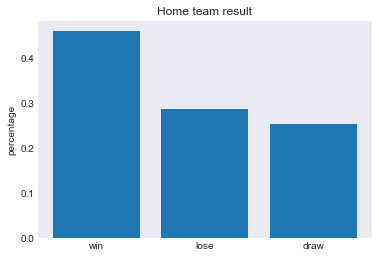

In [41]:
# A bar diagram is the most straightforward visualization for the differences between win, lose and draw chances.
xlabel=['win', 'lose','draw']
plt.bar(xlabel,home_results);
plt.ylabel('percentage')
plt.title('Home team result');

##### The percentage that a home team wins the game is indeed much larger than that of lose or draw. 

##### However, these percentages are only results from available sample. To draw a statistically more meaningful conclusion, I need to perform a hypothesis test based on the sample. 
Null=there is no home game advantage; Alternative=there is home game advantage.

To make things simpler, I consider there are only two outcomes of a game, home_team win or lose. If there is no home_team advantage, the percentage that a home_team wins the game is 0.5. I create a sample where the game result is not draw, and 0 stands for home_team lose, and 1 for home_team win. 

#### Below is the hypothesis test

In [42]:
# extract my sample from match table, where the game result is home win or home lose
hypotest_df=match.query('home_points!=1')['home_points']==3
hypotest_df.count()

19383

In [43]:
# bootstrap my sample 10000 times
boot_means=[]
for _ in range(10000):
    boot_sample=hypotest_df.sample(hypotest_df.count(), replace=True)
    boot_means.append(boot_sample.mean())
boot_means=np.array(boot_means)
sample_mean=boot_means.mean()
sample_std=boot_means.std()
sample_mean, sample_std

(0.6147656038796884, 0.0035154054595979644)

with the std from boot_means, I can calculate the p value

In [44]:
Null_val=np.random.normal(0.5, sample_std, hypotest_df.count())
lowbound=0.5-(sample_mean-0.5)
p=(Null_val>sample_mean).mean() + (Null_val < lowbound).mean()
p

0.0

##### p value is very small. Therefore I reject the null. I have statistically significant evidence that home team does have advantage.

### Answer to question 1: 
#### Yes there is a home game advantage. 

### Research Question 2: Which team improved most over the year?

#### a slope of point_per_game vs. year will be the best quantity to evaluate team improvements. So below I will calculate the slope. I will also create diagrams for visualization of the improvement.

#### calculate slope of points_per_game vs. year

In [45]:
# calculate the slope of points_per_game vs. year, and save it to team_improvement 
team_improvement = team_data.groupby('team_long_name').apply(lambda v: stats.linregress(v.year,v.points_per_game)[0])
team_improvement.sort_values(axis=0, ascending=False).head(10)

team_long_name
Southampton            0.231579
Dundee FC              0.175278
Juventus               0.174406
Paris Saint-Germain    0.171992
Sporting CP            0.159250
Aberdeen               0.158783
RC Celta de Vigo       0.158694
Atlético Madrid        0.151243
RKC Waalwijk           0.128676
West Ham United        0.120718
dtype: float64

##### The top 5 most improved teams are Southampton, Dendee FC, Juventus, Paris Saint-Germain and Sporting CP.

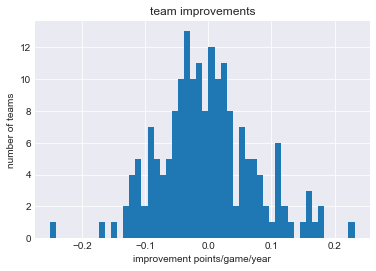

In [46]:
#to check if these values of improvements are indeed at the upper end, I plot a histogram of team imporvements
team_improvement.hist(bins=50)
plt.xlabel('improvement points/game/year')
plt.ylabel('number of teams')
plt.title('team improvements');

##### Slope is rather an abstract concept, so below I plot points_per_game vs. year for direct visualization of the increasing of points_per_game along with year.

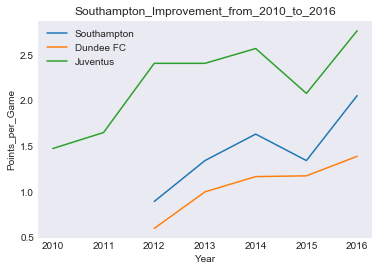

In [47]:
#plot the points_per_game vs year to view improvement of the top 3 teams
x1=team_data.query('team_long_name=="Southampton"')['year']
y1=team_data.query('team_long_name=="Southampton"')['points_per_game']
x2=team_data.query('team_long_name=="Dundee FC"')['year']
y2=team_data.query('team_long_name=="Dundee FC"')['points_per_game']
x3=team_data.query('team_long_name=="Juventus"')['year']
y3=team_data.query('team_long_name=="Juventus"')['points_per_game']
plt.plot(x1,y1, label='Southampton')
plt.plot(x2,y2, label="Dundee FC")
plt.plot(x3,y3, label="Juventus")
plt.legend()
plt.xlabel('Year')
plt.ylabel('Points_per_Game')
plt.title("Southampton_Improvement_from_2010_to_2016");

### Answer to question 2: 
#### The top 5 most improved teams are Southampton, Dendee FC, Juventus, Paris Saint-Germain and Sporting CP.

### Research Question 3: Which team attributes lead to most victories?

#### To answer this question, I need to merge team_attributes with team_data. Points_per_game is still the best measure of victories. 
#### Then I will perform Pearson correlation and t-test to find out the statistical significance. 

In [48]:
#create a year column in team_attributes
team_attributes['year']=pd.to_datetime(team_attributes['date']).dt.year

In [49]:
#merge table team_data and team_attributes on team_api_id and year
team_data=pd.merge(team_data, team_attributes, on=['team_api_id', 'year'])

In [50]:
#view properties of columns
team_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 980
Data columns (total 31 columns):
team_api_id                       981 non-null int64
year                              981 non-null int64
total_goals                       981 non-null int64
num_of_games                      981 non-null int64
total_points                      981 non-null int32
points_per_game                   981 non-null float64
team_long_name                    981 non-null object
num_years                         981 non-null int64
id                                981 non-null int64
team_fifa_api_id                  981 non-null int64
date                              981 non-null object
buildUpPlaySpeed                  981 non-null int64
buildUpPlaySpeedClass             981 non-null object
buildUpPlayDribblingClass         981 non-null object
buildUpPlayPassing                981 non-null int64
buildUpPlayPassingClass           981 non-null object
buildUpPlayPositioningClass       981 no

#### There are quantitative team attributes and categorical team attributes. I will first look at quantitative attributes.

In [51]:
#create a dataframe that contains only quantitative attributes
num_df=team_data[['team_api_id', 'team_long_name', 'year', 'points_per_game','buildUpPlaySpeed','buildUpPlayPassing','chanceCreationPassing','chanceCreationCrossing','chanceCreationShooting','defencePressure','defenceAggression','defenceTeamWidth' ]]

#### To quickly identify team_attributes that are most strongly correlated with points_per_game, I first create a correlation coefficients matrix between columns

In [52]:
#Get a first overall glance of the correlation between quantitative columns.
num_df.corr()

,team_api_id,year,points_per_game,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
team_api_id,1.000000,-0.007839,0.046772,0.052132,-0.003022,-0.042379,0.063503,-0.085082,-0.053151,0.014088,-0.058302
year,-0.007839,1.000000,-0.021977,0.074948,0.048514,0.024844,-0.021954,-0.333363,-0.099163,-0.080795,-0.042233
points_per_game,0.046772,-0.021977,1.000000,-0.008219,-0.159268,0.067678,0.065759,0.109798,0.219724,0.116018,0.089346
buildUpPlaySpeed,0.052132,0.074948,-0.008219,1.000000,0.395065,0.289608,0.162214,0.087372,0.007574,0.131372,0.073289
buildUpPlayPassing,-0.003022,0.048514,-0.159268,0.395065,1.000000,0.163973,0.202657,-0.062444,-0.107224,0.083848,0.039079
chanceCreationPassing,-0.042379,0.024844,0.067678,0.289608,0.163973,1.000000,0.204306,0.154151,0.154627,0.122657,0.109145
chanceCreationCrossing,0.063503,-0.021954,0.065759,0.162214,0.202657,0.204306,1.000000,-0.017948,0.027785,0.065589,0.096794
chanceCreationShooting,-0.085082,-0.333363,0.109798,0.087372,-0.062444,0.154151,-0.017948,1.000000,0.190772,0.116604,0.132674
defencePressure,-0.053151,-0.099163,0.219724,0.007574,-0.107224,0.154627,0.027785,0.190772,1.000000,0.428100,0.481688
defenceAggression,0.014088,-0.080795,0.116018,0.131372,0.083848,0.122657,0.065589,0.116604,0.428100,1.000000,0.227369


##### The top 3 attributes that are best correlated with points_per_game are denfencePressure (positive), buildUpPlayPassing (negative), and chanceCreationShooting (positive).
#### Below I will first visually inspect through scatter plots to find out whether these attributes indeed correlate well with points_per_game

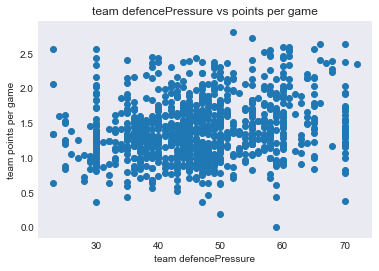

In [53]:
#visual inpection of potential correlation between points_per_game and defencePressure
plt.scatter(num_df.defencePressure, num_df.points_per_game)
plt.title('team defencePressure vs points per game')
plt.xlabel('team defencePressure')
plt.ylabel('team points per game');

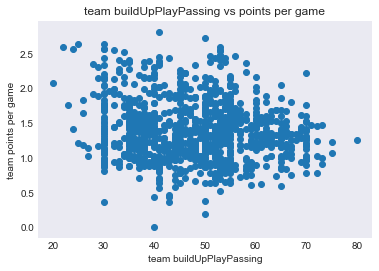

In [54]:
#visual inpection of potential correlation between points_per_game and buildUpPlayPassing
plt.scatter(num_df.buildUpPlayPassing, num_df.points_per_game)
plt.title('team buildUpPlayPassing vs points per game')
plt.xlabel('team buildUpPlayPassing')
plt.ylabel('team points per game');

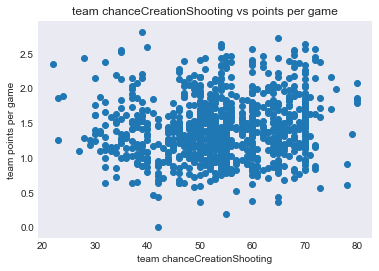

In [55]:
#visual inpection of potential correlation between points_per_game and chanceCreationShooting
plt.scatter(num_df.chanceCreationShooting, num_df.points_per_game)
plt.title('team chanceCreationShooting vs points per game')
plt.xlabel('team chanceCreationShooting')
plt.ylabel('team points per game');

##### By looking at the scatter plots, the correlations of denfencePressure and buildUpPlayPassing versus points_per_game are indeed more apparent than chanceCreationShooting versus points per game
##### However, none of the three scatter plots shows strong correlation. 
#### To find out whether these correlations are statistically significant, I perform Pearson correlations on them to find the p values. 

In [56]:
# Pearson correlation between points_per_game and defencePressure
stats.pearsonr(num_df.points_per_game, num_df.defencePressure)

(0.21972425478575514, 3.441622155031018e-12)

coefficient = 0.22, p=0.0

In [57]:
# Pearson correlation between points_per_game and buildUpPlayPassing
stats.pearsonr(num_df.points_per_game, num_df.buildUpPlayPassing)

(-0.15926776671232523, 5.328469531198922e-07)

coefficient=-0.159, p=0.0

In [58]:
# Pearson correlation between points_per_game and chanceCreationShooting
stats.pearsonr(num_df.points_per_game, num_df.chanceCreationShooting)

(0.10979840882197749, 0.0005710103134383585)

coefficient= 0.109, p=0.00057

##### All the three p-values are very small. So I conclude the correlation is reliable, and the quantitative team attributes lead to most victories are defencePressure, buildUpPlayPassing and chanceCreationShooting.

#### Next I check the correlation of points_per_game to categorical columns.

#### To quickly identify attributes that are more likely to be correlated with points_per_game, I will calculate the mean point_per_game of each categorical value, and pick the columns that show largest differences between mean points_per_game of different categorical values.

Categorical attributes:
buildUpPlaySpeedClass','buildUpPlayDribblingClass','buildUpPlayPassingClass','buildUpPlayPositioningClass',
'chanceCreationPassingClass','chanceCreationCrossingClass','chanceCreationShootingClass','chanceCreationPositioningClass',
'defencePressureClass','defenceAggressionClass','defenceTeamWidthClass','defenceDefenderLineClass'

In [59]:
# unique value and counts of buildUpPlaySpeedClass
team_data['buildUpPlaySpeedClass'].value_counts()

Balanced    773
Fast        132
Slow         76
Name: buildUpPlaySpeedClass, dtype: int64

In [60]:
# mean points_per_game of each category value
buildUpPlaySpeedClass_mean_balanced=team_data.query('buildUpPlaySpeedClass=="Balanced"')['points_per_game'].mean()
buildUpPlaySpeedClass_mean_fast=team_data.query('buildUpPlaySpeedClass=="Fast"')['points_per_game'].mean()
buildUpPlaySpeedClass_mean_slow=team_data.query('buildUpPlaySpeedClass=="Slow"')['points_per_game'].mean()
buildUpPlaySpeedClass_mean_balanced, buildUpPlaySpeedClass_mean_fast, buildUpPlaySpeedClass_mean_slow

(1.3965367544315153, 1.4979217091232124, 1.4578486220878784)

In [61]:
# unique value and counts of buildUpPlayDribblingClass
team_data['buildUpPlayDribblingClass'].value_counts()

Little    668
Normal    295
Lots       18
Name: buildUpPlayDribblingClass, dtype: int64

In [62]:
# mean points_per_game of each category value
buildUpPlayDribblingClass_mean_little=team_data.query('buildUpPlayDribblingClass=="Little"')['points_per_game'].mean()
buildUpPlayDribblingClass_mean_Normal=team_data.query('buildUpPlayDribblingClass=="Normal"')['points_per_game'].mean()
buildUpPlayDribblingClass_mean_lots=team_data.query('buildUpPlayDribblingClass=="Lots"')['points_per_game'].mean()
buildUpPlayDribblingClass_mean_little, buildUpPlayDribblingClass_mean_Normal, buildUpPlayDribblingClass_mean_lots

(1.4178329966806256, 1.4033355374463243, 1.4971470405100435)

In [63]:
# unique value and counts of buildUpPlayPassingClass
team_data['buildUpPlayPassingClass'].value_counts()

Mixed    835
Short     96
Long      50
Name: buildUpPlayPassingClass, dtype: int64

In [64]:
# mean points_per_game of each category value
buildUpPlayPassingClass_mean_mixed=team_data.query('buildUpPlayPassingClass=="Mixed"')['points_per_game'].mean()
buildUpPlayPassingClass_mean_short=team_data.query('buildUpPlayPassingClass=="Short"')['points_per_game'].mean()
buildUpPlayPassingClass_mean_long=team_data.query('buildUpPlayPassingClass=="Long"')['points_per_game'].mean()
buildUpPlayPassingClass_mean_mixed,buildUpPlayPassingClass_mean_short, buildUpPlayPassingClass_mean_long

(1.402525376796923, 1.608315202023083, 1.2507624607771668)

In [65]:
# unique value and counts of buildUpPlayPositioningClass
team_data['buildUpPlayPositioningClass'].value_counts()

Organised    913
Free Form     68
Name: buildUpPlayPositioningClass, dtype: int64

In [66]:
# mean points_per_game of each category value
buildUpPlayPositioningClass_mean_organised=team_data.query('buildUpPlayPositioningClass=="Organised"')['points_per_game'].mean()
buildUpPlayPositioningClass_mean_freeform=team_data.query('buildUpPlayPositioningClass=="Free Form"')['points_per_game'].mean()
buildUpPlayPositioningClass_mean_organised, buildUpPlayPositioningClass_mean_freeform

(1.3875399589352762, 1.782663081626432)

In [67]:
# unique value and counts of chanceCreationPassingClass
team_data['chanceCreationPassingClass'].value_counts()

Normal    824
Risky     118
Safe       39
Name: chanceCreationPassingClass, dtype: int64

In [68]:
# mean points_per_game of each category value
chanceCreationPassingClass_mean_normal=team_data.query('chanceCreationPassingClass=="Normal"')['points_per_game'].mean()
chanceCreationPassingClass_mean_risky=team_data.query('chanceCreationPassingClass=="Risky"')['points_per_game'].mean()
chanceCreationPassingClass_mean_safe=team_data.query('chanceCreationPassingClass=="Safe"')['points_per_game'].mean()
chanceCreationPassingClass_mean_normal, chanceCreationPassingClass_mean_risky, chanceCreationPassingClass_mean_safe

(1.398178496219548, 1.5494244048747268, 1.3618951640610344)

In [69]:
# unique value and counts of chanceCreationCrossingClass
team_data['chanceCreationCrossingClass'].value_counts()

Normal    809
Lots      139
Little     33
Name: chanceCreationCrossingClass, dtype: int64

In [70]:
# mean points_per_game of each category value
chanceCreationCrossingClass_mean_normal=team_data.query('chanceCreationCrossingClass=="Normal"')['points_per_game'].mean()
chanceCreationCrossingClass_mean_lots=team_data.query('chanceCreationCrossingClass=="Lots"')['points_per_game'].mean()
chanceCreationCrossingClass_mean_little=team_data.query('chanceCreationCrossingClass=="Little"')['points_per_game'].mean()
chanceCreationCrossingClass_mean_normal, chanceCreationCrossingClass_mean_lots, chanceCreationCrossingClass_mean_little

(1.4067366691118466, 1.4311598177321316, 1.5473906691592452)

In [71]:
# unique value and counts of chanceCreationShootingClass
team_data['chanceCreationShootingClass'].value_counts()

Normal    803
Lots      145
Little     33
Name: chanceCreationShootingClass, dtype: int64

In [72]:
# mean points_per_game of each category value
chanceCreationShootingClass_mean_normal=team_data.query('chanceCreationShootingClass=="Normal"')['points_per_game'].mean()
chanceCreationShootingClass_mean_lots=team_data.query('chanceCreationShootingClass=="Lots"')['points_per_game'].mean()
chanceCreationShootingClass_mean_little=team_data.query('chanceCreationShootingClass=="Little"')['points_per_game'].mean()
chanceCreationShootingClass_mean_normal, chanceCreationShootingClass_mean_lots, chanceCreationShootingClass_mean_little

(1.37822879072967, 1.6034583579055837, 1.4795724607960743)

In [73]:
# unique value and counts of chanceCreationPositioningClass
team_data['chanceCreationPositioningClass'].value_counts()

Organised    849
Free Form    132
Name: chanceCreationPositioningClass, dtype: int64

In [74]:
# mean points_per_game of each category value
chanceCreationPositioningClass_mean_organised=team_data.query('chanceCreationPositioningClass=="Organised"')['points_per_game'].mean()
chanceCreationPositioningClass_mean_freeform=team_data.query('chanceCreationPositioningClass=="Free Form"')['points_per_game'].mean()
chanceCreationPositioningClass_mean_organised,chanceCreationPositioningClass_mean_freeform

(1.3699794423196439, 1.704034284311568)

In [75]:
# unique value and counts of defencePressureClass
team_data['defencePressureClass'].value_counts()

Medium    843
Deep      100
High       38
Name: defencePressureClass, dtype: int64

In [76]:
# mean points_per_game of each category value
defencePressureClass_mean_Medium=team_data.query('defencePressureClass=="Medium"')['points_per_game'].mean()
defencePressureClass_mean_Deep=team_data.query('defencePressureClass=="Deep"')['points_per_game'].mean()
defencePressureClass_mean_High=team_data.query('defencePressureClass=="High"')['points_per_game'].mean()
defencePressureClass_mean_Medium,defencePressureClass_mean_Deep, defencePressureClass_mean_High

(1.420787469774845, 1.3069268511189753, 1.5691723664845583)

In [77]:
# unique value and counts of defenceAggressionClass
team_data['defenceAggressionClass'].value_counts()

Press      858
Double      63
Contain     60
Name: defenceAggressionClass, dtype: int64

In [78]:
# mean points_per_game of each category value
defenceAggressionClass_mean_Press=team_data.query('defenceAggressionClass=="Press"')['points_per_game'].mean()
defenceAggressionClass_mean_Double=team_data.query('defenceAggressionClass=="Double"')['points_per_game'].mean()
defenceAggressionClass_mean_Contain=team_data.query('defenceAggressionClass=="Contain"')['points_per_game'].mean()
defenceAggressionClass_mean_Press,defenceAggressionClass_mean_Double, defenceAggressionClass_mean_Contain

(1.4155661371397343, 1.457556709058539, 1.361054228698752)

In [79]:
# unique value and counts of defenceTeamWidthClass
team_data['defenceTeamWidthClass'].value_counts()

Normal    870
Wide       72
Narrow     39
Name: defenceTeamWidthClass, dtype: int64

In [80]:
# mean points_per_game of each category value
defenceTeamWidthClass_mean_Normal=team_data.query('defenceTeamWidthClass=="Normal"')['points_per_game'].mean()
defenceTeamWidthClass_mean_Wide=team_data.query('defenceTeamWidthClass=="Wide"')['points_per_game'].mean()
defenceTeamWidthClass_mean_Narrow=team_data.query('defenceTeamWidthClass=="Narrow"')['points_per_game'].mean()
defenceTeamWidthClass_mean_Normal,defenceTeamWidthClass_mean_Wide, defenceTeamWidthClass_mean_Narrow

(1.4150961033659348, 1.4441900863362898, 1.357173741382779)

In [81]:
# unique value and counts of defenceDefenderLineClass
team_data['defenceDefenderLineClass'].value_counts()

Cover           914
Offside Trap     67
Name: defenceDefenderLineClass, dtype: int64

In [82]:
# mean points_per_game of each category value
defenceDefenderLineClass_mean_Cover=team_data.query('defenceDefenderLineClass=="Cover"')['points_per_game'].mean()
defenceDefenderLineClass_mean_OffsideTrap=team_data.query('defenceDefenderLineClass=="Offside Trap"')['points_per_game'].mean()
defenceDefenderLineClass_mean_Cover,defenceDefenderLineClass_mean_OffsideTrap

(1.4060238730348038, 1.5364067478312429)

##### The top 3 categorical attributes that are likely to correlated with team performance are chanceCreationPositioningClass, buildUpPlayPassingClass and buildUpPlayPositioningClass. 

#### To gain a more detailed understanding and statistical evidence, next I will
#### (1) plot histograms of points_per_game of each category, 
#### (2) do a t-test on these three categories. 

#### visual inspection of potential correlation between points_per_game and chanceCreationPositioningClass

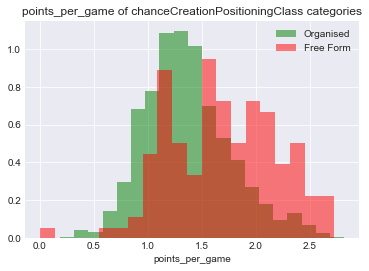

In [83]:
#histogram of points_per_game of each category value of chanceCreationPositioningClass
team_data.query('chanceCreationPositioningClass=="Organised"')['points_per_game'].hist(color='green',alpha=0.5,bins=20, density=True, label='Organised')
team_data.query('chanceCreationPositioningClass=="Free Form"')['points_per_game'].hist(color='red',alpha=0.5,bins=20, density=True, label='Free Form')
plt.legend()
plt.title('points_per_game of chanceCreationPositioningClass categories')
plt.xlabel('points_per_game');

##### From the histogram, points_per_game of Free Form is visibly higher than Organised, on average.
####  Then I perform a student t-test to obtain evidence that the observed difference in visual is statistically significant. 

In [84]:
# t-test on chanceCreationPositioningClass Organized and Free Form
stats.ttest_ind(team_data.query('chanceCreationPositioningClass=="Organised"')['points_per_game'],team_data.query('chanceCreationPositioningClass=="Free Form"')['points_per_game'],equal_var=False)

Ttest_indResult(statistic=-7.236601802807965, pvalue=1.8831120781658832e-11)

##### Both t-statistic is large enough and p values is small enough to support that the team attribute chanceCreationPositioningClass Free Form leads to more team victories.

#### visual inspection of potential correlation between points_per_game and buildUpPlayPassingClass

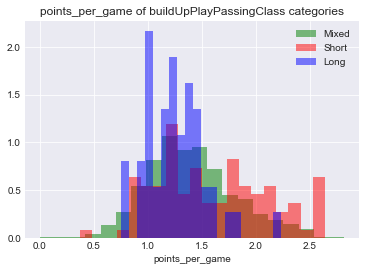

In [85]:
#histogram of points_per_game of each category value of buildUpPlayPassingClass
team_data.query('buildUpPlayPassingClass=="Mixed"')['points_per_game'].hist(color='green',alpha=0.5,bins=20, density=True, label='Mixed')
team_data.query('buildUpPlayPassingClass=="Short"')['points_per_game'].hist(color='red',alpha=0.5,bins=20, density=True, label='Short')
team_data.query('buildUpPlayPassingClass=="Long"')['points_per_game'].hist(color='blue',alpha=0.5,bins=20, density=True, label='Long')
plt.legend()
plt.title('points_per_game of buildUpPlayPassingClass categories')
plt.xlabel('points_per_game');

##### From the histogram, points_per_game of Long is visibly lower than other two. And points_per_game of Short is higher than the other two.
#####  Then I perform a student t-test to obtain evidence that the observed difference in visual is statistically significant. 

In [86]:
# t-test on buildUpPlayPassingClass Mixed and Short
stats.ttest_ind(team_data.query('buildUpPlayPassingClass=="Mixed"')['points_per_game'],team_data.query('buildUpPlayPassingClass=="Short"')['points_per_game'],equal_var=False)

Ttest_indResult(statistic=-3.7079041060853006, pvalue=0.00032958081063664033)

In [87]:
# t-test on buildUpPlayPassingClass Mixed and Long
stats.ttest_ind(team_data.query('buildUpPlayPassingClass=="Mixed"')['points_per_game'],team_data.query('buildUpPlayPassingClass=="Long"')['points_per_game'],equal_var=False)

Ttest_indResult(statistic=3.5811551790573963, pvalue=0.0006650914655433903)

In [88]:
# t-test on buildUpPlayPassingClass Short and Long
stats.ttest_ind(team_data.query('buildUpPlayPassingClass=="Short"')['points_per_game'],team_data.query('buildUpPlayPassingClass=="Long"')['points_per_game'],equal_var=False)

Ttest_indResult(statistic=5.361453685076605, pvalue=3.2138910726726413e-07)

##### In all 3 t-tests, both t-statistic is large enough and p values is small enough to support that the team attribute buildUpPlayPassingClass Short  leads to more team victories, and Long leads to less victories.

#### visual inspection of potential correlation between points_per_game and buildUpPlayPositioningClass

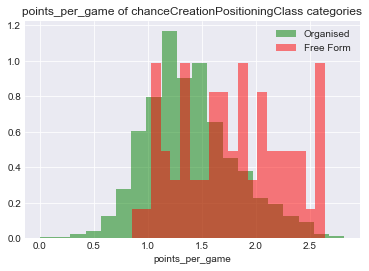

In [89]:
#histogram of points_per_game of each category value of buildUpPlayPositioningClass
team_data.query('buildUpPlayPositioningClass=="Organised"')['points_per_game'].hist(color='green',alpha=0.5,bins=20, density=True, label='Organised')
team_data.query('buildUpPlayPositioningClass=="Free Form"')['points_per_game'].hist(color='red',alpha=0.5,bins=20, density=True, label='Free Form')
plt.legend()
plt.title('points_per_game of chanceCreationPositioningClass categories')
plt.xlabel('points_per_game');

##### From the histogram, points_per_game of Free Form is visibly higher than Organised, on average.
#####  Then I perform a student t-test to obtain evidence that the observed difference in visual is statistically significant. 

In [90]:
# t-test on buildUpPlayPositioningClass Organised and Free Form
stats.ttest_ind(team_data.query('buildUpPlayPositioningClass=="Organised"')['points_per_game'],team_data.query('buildUpPlayPositioningClass=="Free Form"')['points_per_game'],equal_var=False)

Ttest_indResult(statistic=-6.502439185808116, pvalue=8.022425113846984e-09)

##### Statistic is more than 6, and p value is very small. This is a statistically significant evidence that Free Form buildUpPlayPositioningClass leads to more victories.

### Answer to question 3: 
#### The top 6 attributes (3 quantitative and 3 categorical) that lead to most victories are:defencePressure, buildUpPlayPassing, anchanceCreationShooting, chanceCreationPositioningClass, buildUpPlayPassingClass and buildUpPlayPositioningClass

### Research Question 4: Which player has most penalties?

#### To answer this question, I simply need to group player_attributes by player_name, and count 

In [91]:
###Count individual players number of penalties
player_data.groupby('player_name')['penalties'].sum().sort_values(ascending=False).head()

player_name
Danilo      6238.0
Fernando    4764.0
Douglas     4687.0
Josue       4671.0
Rafinha     4633.0
Name: penalties, dtype: float64

### Answer to question 4: 
#### Danilo has the most number of penalties.

### Research Question 5: How does the player age distribution look like?
#### To answer this question, I will find out the center, shape, variance and range of player age distribution

In [92]:
###find player age range
player_data['age'].describe()

count    180228.000000
mean         25.652917
std           4.708167
min           7.832991
25%          22.220397
50%          25.459274
75%          28.881588
max          43.800137
Name: age, dtype: float64

##### player age range is 7.8-43.8 , mean is 25.6, standard deviation is 4.7, and variance is 22.2

#### Below I will create a histogram for direct visualization of shape of player age distribution

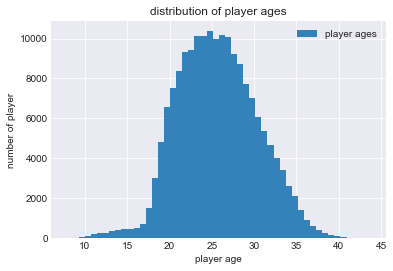

In [94]:
#plot a histogram of player age distribution
player_data.age.hist(bins=50, alpha=0.9, label='player ages')
plt.xlabel('player age')
plt.ylabel('number of player')
plt.title('distribution of player ages')
plt.legend();

##### Distribution of player ages is centered around 25. It seems to be skewed to right. There is a tiny tail in the left between 8-18. This tail looks like another independent group of players. More detailed analysis focusing on this group will certainly reveal more interesting results.

### Answer to question 5: 
#### Player ages range from 7.8 to 43.8. It has mean of 25.6 and variance of 22.6. It is not a normal distribution. It is skewed to right.

### Research Question 6: What affect players overall rating?
#### To answer this question, I will look into correlations between player overall_rating and attributes columns. The columns that has large coefficients and lower p values are most like to affect player overall_rating

#### I will first look at quantitative attributes. 
##### (1) First I will calculate their Pearson correlation coefficients with overall_rating. Columns with larger coefficients are more likely to be strongly correlated with overall_rating.  
##### (2) Then I will make scatter plots for visual inspection, to make sure that the correlation is visibly strong. 
##### (3) Finally to obtain evidence that the correlation is statistically significant, I will obtain p values of Pearson correlation.  

In [95]:
#create listw of columns that are quantitative
num_cols=['potential', 'crossing', 'finishing', 'heading_accuracy','short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy','long_passing', 'ball_control', 'acceleration', 'sprint_speed','agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina','strength', 'long_shots', 'aggression', 'interceptions', 'positioning','vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle','gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning','gk_reflexes', 'height', 'weight','age']

In [96]:
# create a list containing Pearson's correlation between 'overall_rating' with each column in num_cols
correlations =pd.Series([ player_data['overall_rating'].corr(player_data[f]) for f in num_cols ], index=num_cols)
correlations.sort_values(ascending=False)

reactions             0.771831
potential             0.765354
short_passing         0.458174
ball_control          0.443930
long_passing          0.434507
vision                0.431267
shot_power            0.428210
penalties             0.392648
long_shots            0.392551
age                   0.382509
positioning           0.368788
volleys               0.361612
curve                 0.357268
crossing              0.357110
dribbling             0.353983
free_kick_accuracy    0.349506
finishing             0.329897
stamina               0.325639
aggression            0.322972
strength              0.316768
heading_accuracy      0.313816
jumping               0.259984
sprint_speed          0.252688
interceptions         0.249619
acceleration          0.243585
agility               0.239475
standing_tackle       0.164485
balance               0.159659
marking               0.132645
sliding_tackle        0.128477
weight                0.063879
gk_kicking            0.028956
gk_divin

##### Reactions is most strongly correlated with overall_rating. Majority of other attributes are also strongly correlated with overall_rating, with more than 3/4 of them having a coefficient larger than 0.2.
####  Next I will inspect the correlation through scatter plots

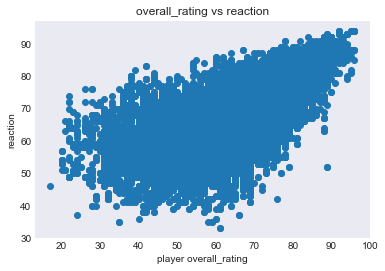

In [97]:
# scatter plot of overall_rating vs reactions
plt.scatter(player_data['reactions'], player_data['overall_rating'])
plt.xlabel('player overall_rating')
plt.ylabel('reaction')
plt.title('overall_rating vs reaction');

#####  Judging from the scatter plot, overall_rating is indeed strongly positively correlated with reactions.

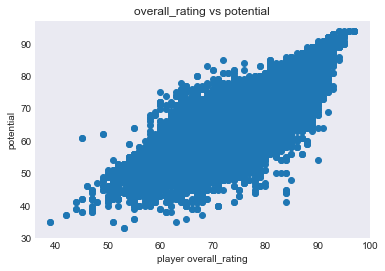

In [98]:
# scatter plot of overall_rating vs potential
plt.scatter(player_data['potential'], player_data['overall_rating'])
plt.xlabel('player overall_rating')
plt.ylabel('potential')
plt.title('overall_rating vs potential');

#####  Judging from the scatter plot, overall_rating is indeed strongly positively correlated with potential.

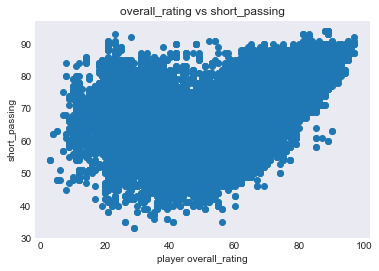

In [99]:
# scatter plot of overall_rating vs short_passing
plt.scatter(player_data['short_passing'], player_data['overall_rating'])
plt.xlabel('player overall_rating')
plt.ylabel('short_passing')
plt.title('overall_rating vs short_passing');

#####  Judging from the scatter plot, overall_rating is indeed strongly positively correlated with short_passing.

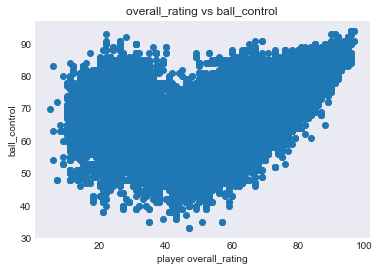

In [100]:
# scatter plot of overall_rating vs ball_control
plt.scatter(player_data['ball_control'], player_data['overall_rating'])
plt.xlabel('player overall_rating')
plt.ylabel('ball_control')
plt.title('overall_rating vs ball_control');

#####  Judging from the scatter plot, overall_rating is indeed strongly positively correlated with ball_control.

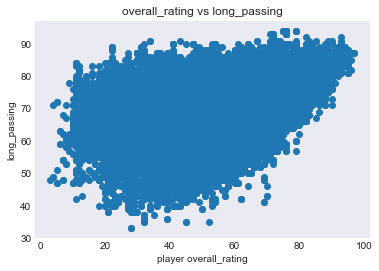

In [101]:
# scatter plot of overall_rating vs long_passing
plt.scatter(player_data['long_passing'], player_data['overall_rating'])
plt.xlabel('player overall_rating')
plt.ylabel('long_passing')
plt.title('overall_rating vs long_passing');

#####  Judging from the scatter plot, overall_rating is indeed strongly positively correlated with long_passing.
#### To obtain statistical evidence for the correlations, I will next perform Pearson correlation

In [102]:
#Pearson correlation between overall_rating and reactions
stats.pearsonr(player_data['overall_rating'],player_data['reactions'])

(0.7718305380078719, 0.0)

#####  The coefficient of reactions vs overall_rating is 0.77, p values is 0. Therefore the correlation between reaction and overall_rating is statistically significant. 

In [103]:
#pearson correlation between overall_rating and potential
stats.pearsonr(player_data['overall_rating'],player_data['potential'])

(0.7653540103661755, 0.0)

#####  The coefficient of potential vs overall_rating is 0.76, p values is 0. Therefore the correlation between potential and overall_rating is statistically significant. 

In [104]:
#pearson correlation between overall_rating and short_passing
stats.pearsonr(player_data['overall_rating'],player_data['short_passing'])

(0.4581742546783428, 0.0)

#####  The coefficient of short_passing vs overall_rating is 0.46, p values is 0. Therefore the correlation between short_passing and overall_rating is statistically significant. 

In [105]:
#pearson correlation between overall_rating and ball_control
stats.pearsonr(player_data['overall_rating'],player_data['ball_control'])

(0.443929865933167, 0.0)

#####  The coefficient of ball_control vs overall_rating is 0.44, p values is 0. Therefore the correlation between ball_control and overall_rating is statistically significant. 

In [106]:
#pearson correlation between overall_rating and long_passing
stats.pearsonr(player_data['overall_rating'],player_data['long_passing'])

(0.43450686647068165, 0.0)

#####  The coefficient of long_passing vs overall_rating is 0.43, p values is 0. Therefore the correlation between long_passing and overall_rating is statistically significant. 

####  Next I will check the correlation between overall_rating and categorical attributes. 
#####  (1) I will first create histograms of overall_ratings of each categorical value,  if there is visible shift between histograms, the category is likely to be correlated with overall_rating
#####  (2) Then I will obtain statistical evidence to support conclusion drawn from histograms, through students t-test.

In [107]:
#check unique values of preferred_foot
player_data['preferred_foot'].unique()

array(['right', 'left'], dtype=object)

####  Create a histogram to visually inspect if there is difference between overall_rating of players preferring left and right foot.

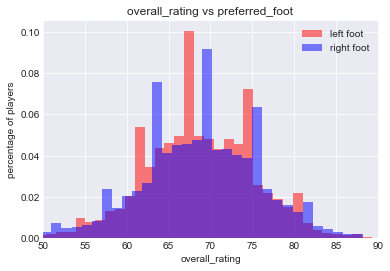

In [108]:
#histograms of the overall_ratings of players who prefer left foot and who prefer right food are completely overlapped
player_data.query('preferred_foot=="left"')['overall_rating'].hist(color='red', alpha=0.5,label='left foot', bins=50, density=True)
player_data.query('preferred_foot=="right"')['overall_rating'].hist(color='blue', alpha=0.5,label='right foot', bins=50, density=True)
plt.xlabel('overall_rating')
plt.xlim(50,90)
plt.ylabel('percentage of players')
plt.title('overall_rating vs preferred_foot')
plt.legend();

##### By looking at the histogram, there doesn't seem to be a noticeable difference between the overall_rating of players using left and right foot.

#### Perform a student t-test to support my conclusion drawn from visual.

In [109]:
stats.ttest_ind(player_data.query('preferred_foot=="left"')['overall_rating'], player_data.query('preferred_foot=="right"')['overall_rating'],equal_var=False)

Ttest_indResult(statistic=0.6885746058873934, pvalue=0.4910930182245401)

##### statistic is less than 1, and p value is 0.49. Therefore difference between the overall_ratings of players using left or right foot is not statistically significant.

####  Visually inspect potential correlation between overall_rating and attacking_work_rate through histogram

In [110]:
#check unique values of the categorical attribute "attacking_work_rate".
#Majority of the players fall into medium, high, low or None category. So I will only consider players who are in these four values.
player_data.attacking_work_rate.value_counts()

medium    125022
high       42775
low         8569
None        3287
norm         317
y             94
stoc          86
le            78
Name: attacking_work_rate, dtype: int64

In [111]:
#create seperate dataframe for the 4 unique values of attacking_work_rate, that represent majority of players
medium_attack=player_data.query('attacking_work_rate=="medium"')
high_attack=player_data.query('attacking_work_rate=="high"')
low_attack=player_data.query('attacking_work_rate=="low"')
None_attack=player_data.query('attacking_work_rate=="None"')

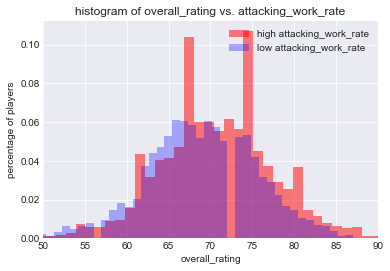

In [112]:
#first check in histogram of high_attack and low_attack if there is visible difference.
high_attack['overall_rating'].hist(color='red', alpha=0.5,label='high attacking_work_rate', bins=50, weights=np.ones_like(high_attack['overall_rating'])/len(high_attack['overall_rating']))
low_attack['overall_rating'].hist(color='blue', alpha=0.3,label='low attacking_work_rate', bins=50, weights=np.ones_like(low_attack['overall_rating'])/len(low_attack['overall_rating']))
plt.xlabel('overall_rating')
plt.xlim(50,90)
plt.ylabel('percentage of players')
plt.title('histogram of overall_rating vs. attacking_work_rate')
plt.legend();

##### From the histogram, the over rating of high attacking_work_rate is visibly higher than low attacking_work_rate. So next I will perform 6 t-test on the all four values of attacking_work_rate.

#### Perform a student t-test to support my conclusion drawn from visual.

In [113]:
stats.ttest_ind(high_attack['overall_rating'], medium_attack['overall_rating'],equal_var=False)

Ttest_indResult(statistic=67.17927873247966, pvalue=0.0)

In [114]:
stats.ttest_ind(high_attack['overall_rating'], low_attack['overall_rating'],equal_var=False)

Ttest_indResult(statistic=21.3410540151568, pvalue=2.914227665560095e-99)

In [115]:
stats.ttest_ind(high_attack['overall_rating'], None_attack['overall_rating'],equal_var=False)

Ttest_indResult(statistic=39.00199783230472, pvalue=1.6136352009824546e-281)

In [116]:
stats.ttest_ind(medium_attack['overall_rating'], low_attack['overall_rating'],equal_var=False)

Ttest_indResult(statistic=-11.648186300823038, pvalue=3.742775258793313e-31)

In [117]:
stats.ttest_ind(medium_attack['overall_rating'], None_attack['overall_rating'],equal_var=False)

Ttest_indResult(statistic=16.5287490852461, pvalue=3.694498344403986e-59)

In [118]:
stats.ttest_ind(low_attack['overall_rating'], None_attack['overall_rating'],equal_var=False)

Ttest_indResult(statistic=20.686100421037782, pvalue=4.2653925435795296e-92)

##### The p value of all the 6 t-tests between overall_rating of the 4 values of attacking_work_rate are all very small. The statistics are all above 10. Therefore I conclude that attacking_work_rate affects overall rating.

####  Visually inspect potential correlation between overall_rating and defensive_work_rate through histogram

In [119]:
#check unique values of defensive_work_rate
player_data.defensive_work_rate.value_counts()

medium    130785
high       27041
low        18426
o           1328
1            421
ormal        317
2            299
3            232
5            231
7            207
0            188
6            166
9            143
4            116
es            94
tocky         86
ean           78
8             70
Name: defensive_work_rate, dtype: int64

In [120]:
#I will only consider the players whose value of defensive_work_rate are medium, high or low
medium_defense=player_data.query('defensive_work_rate=="medium"')
high_defense=player_data.query('defensive_work_rate=="high"')
low_defense=player_data.query('defensive_work_rate=="low"')

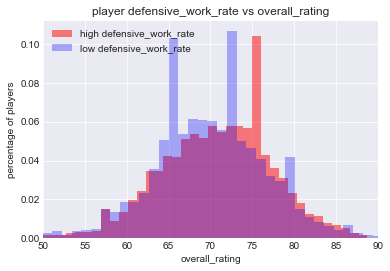

In [121]:
#plot a hightogram of high and low defensive_work_rate
high_defense['overall_rating'].hist(color='red', alpha=0.5,label='high defensive_work_rate', bins=50, weights=np.ones_like(high_defense['overall_rating'])/len(high_defense['overall_rating']) )
low_defense['overall_rating'].hist(color='blue', alpha=0.3,label='low defensive_work_rate', bins=50, weights=np.ones_like(low_defense['overall_rating'])/len(low_defense['overall_rating']) )
plt.xlabel('overall_rating')
plt.ylabel('percentage of players')
plt.title('player defensive_work_rate vs overall_rating')
plt.xlim(50,90)
plt.legend();

##### There is a visible shift between the two histograms. So next I will do a t-test to get the p values.

#### Perform a student t-test to support my conclusion drawn from visual.

In [122]:
stats.ttest_ind(high_defense['overall_rating'], medium_defense['overall_rating'], equal_var=False)

Ttest_indResult(statistic=61.517055900231775, pvalue=0.0)

In [123]:
stats.ttest_ind(high_defense['overall_rating'], low_defense['overall_rating'], equal_var=False)

Ttest_indResult(statistic=12.722405166361643, pvalue=5.2557319146435206e-37)

In [124]:
stats.ttest_ind(medium_defense['overall_rating'], low_defense['overall_rating'], equal_var=False)

Ttest_indResult(statistic=-36.411921416562244, pvalue=1.0598036490489774e-282)

##### The p values are all very small. The statistics are all above 10. Therefore I conclude that defensive_work_rate affects player overall rating

### Answer to question 6: 
#### The top attributes that affect player performance are: reactions, potential, short_passing, ball_control, long_passing, defensive_work_rate and attacking_work_rate

In [125]:
#close connection to database
conn.close()

<a id='conclusions'></a>
## Conclusions
> It was a really good experience working on this project! I gained tremendous experience in data analysis! I also became more patient when searching for solutions on internet and reading other people's codes. There are certainly multiple challenges that I faced while working on this project, but some time I don't realize that these are challenges. Below I summarize the limitations I faced and answers to my questions.  
### Limitations
#### (1) Missing data
   > During data wangling, I faced large amount of missing data. In the match table, although the columns needed for my questions are all clean, all other columns have too many missing data, with some of them missing 20%. These columns could be very helpful in answering other interesting questions such as betting odds.
   > In the team_attributes data, more than 50% of data in the column 'buildUpPlayDribbling' is missing, therefore analysis on this column will be less reliable.
   > In the table player_attributes, all the attributes columns have missing values. Although percentage of rows containing at least one missing value is less than 2%, consider the large total number of rows, 2% is actually several thousand, and they could potentially bias analysis results.
#### (2) Insufficient amount of data
   > This issue arised when I was trying to find any team_attributes that are most correlated with team performance. For example when analyzing column 'buildUpPlayPositioningClass' vs points_per_game, count of 'Organised' is 913, and count of 'Free Form' is only 68. This big difference in counts might cause error, and if there are more teams using 'Free Form', the result will be more reliable.

### match table analysis
#### (1) Is there a home game advantage?
   > The answer is clearly yes, both from bar charts and hypothesis test result, when only considering win and lose, not draw. I didn't know what to do with draw results. If draw results are also included in my sample, the results will be more convincing. 
#### (2) Which team improved most over the years?   
   > The top five most improved teams are Southampton, Dendee FC, Juventus, Paris Saint-Germain and Sporting CP. It would be more interesting to find out what caused these improvement. Is it an improvement in one of team attribute or recruitment of a top player?
#### (3) which team attributes lead to most victories?
   > The answer is defencePressure, buildUpPlayPassing, anchanceCreationShooting, chanceCreationPositioningClass, buildUpPlayPassingClass and buildUpPlayPositioningClass. The first 3 attributes are quantitative, and I did a visual inspect and found that the correlation is not very strong. The last 3 attributes are categorical. I notices that in all the categorical attributes, the difference between value counts are big. For example for the attribute 'buildUpPlayPositioningClass', count of 'Organised' is 913, and count of 'Free Form' is only 68. This big difference in count might caused error, and if there more teams using 'Free Form', the result will be more reliable.

### player_attributes and player table analysis
#### (1) Which player has the most penalties?
   > The answer is Danilo.  This is done by grouping player_attributes by player_api_id. A more fair comparison would be penalties per year.
#### (2) What is the distribution of player age?
   > Player ages range from 7.8 to 43.8. Its mean and variance are 25.6 and 22.2. It is right skewed. There are some very young players. A more detailed analysis will require dividing the player age into two groups, younger than 18 and at least 18. Then various questions can be asked on each group.
#### (3) What affect players overall rating?
   > Top attributes that affect player rating are: reactions, potential, short_passing, ball_control, long_passing, defensive_work_rate and attacking_work_rate. Judging from Pearson correlation coefficients, most quantitative player attributes are more or less correlated with overall_rating. Surprisingly, whether a player prefers left or right foot does not affect his overall_rating. 

## Acknowledgment
>During work on this project, I frequently found help on these websites:
https://www.kaggle.com
https://stackoverflow.com